# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

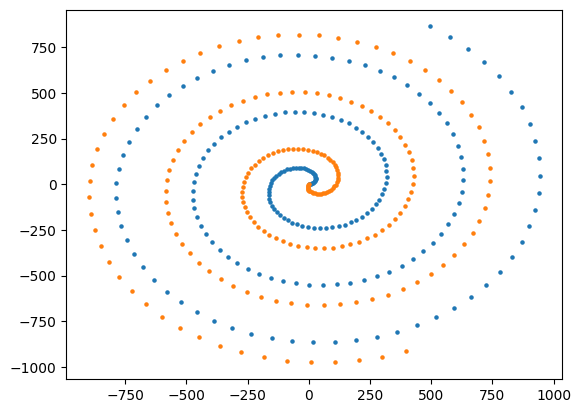

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_33332\2939864048.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


0    200
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

### preprocess the data 

In [42]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [43]:
features = df[["X","Y"]].values
labels = df["CLASS"].values

# split the date in training and test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [44]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),  # Input layer with 2 features (X, Y)
    Dense(128, activation='relu'),                   # Hidden layer
    Dense(128, activation='relu'),                   # Another hidden layer
    Dense(1, activation='sigmoid')                   # Output layer
])

In [45]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [46]:
history = model.fit(
    X_train, y_train,
    epochs=100,  # Number of epochs might need to be adjusted
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
8/8 [==============================] - 0s 13ms/step - loss: 7.4554 - accuracy: 0.4727 - val_loss: 4.2132 - val_accuracy: 0.5469
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 3.9916 - accuracy: 0.4766 - val_loss: 2.5969 - val_accuracy: 0.5156
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 3.0828 - accuracy: 0.4961 - val_loss: 4.5606 - val_accuracy: 0.4531
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 2.4105 - accuracy: 0.5156 - val_loss: 3.1939 - val_accuracy: 0.5000
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.8205 - accuracy: 0.5508 - val_loss: 2.3639 - val_accuracy: 0.5312
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 1.5417 - accuracy: 0.5742 - val_loss: 2.5549 - val_accuracy: 0.4531
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 1.4504 - accuracy: 0.5312 - val_loss: 2.1501 - val_accuracy: 0.4844
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 3ms/step - loss: 0.9545 - accuracy: 0.5781 - val_loss: 1.3180 - val_accuracy: 0.5000
Epoch 60/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8506 - accuracy: 0.5469 - val_loss: 1.5718 - val_accuracy: 0.5156
Epoch 61/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9838 - accuracy: 0.4766 - val_loss: 1.0385 - val_accuracy: 0.4531
Epoch 62/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7985 - accuracy: 0.5430 - val_loss: 1.0617 - val_accuracy: 0.4219
Epoch 63/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8252 - accuracy: 0.5430 - val_loss: 1.1444 - val_accuracy: 0.5312
Epoch 64/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8249 - accuracy: 0.5898 - val_loss: 1.1573 - val_accuracy: 0.4844
Epoch 65/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9302 - accuracy: 0.5391 - val_loss: 1.1448 - val_accuracy: 0.4844
Epoch 66/100
8/8 [===============

In [47]:
evaluation = model.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

3/3 [==============================] - 0s 2ms/step - loss: 1.1310 - accuracy: 0.4375
Test Loss: 1.1310259103775024, Test Accuracy: 0.4375


3/3 [==============================] - 0s 1ms/step


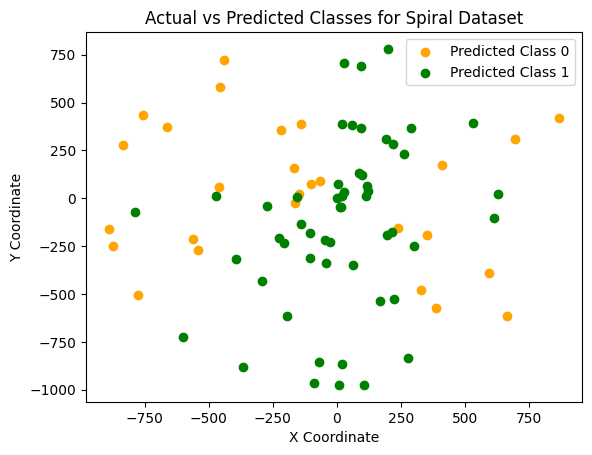

In [48]:


# Generate predictions for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Scatter plot for predicted classes
plt.scatter(X_test[y_pred[:, 0] == 0][:, 0], X_test[y_pred[:, 0] == 0][:, 1], color='orange', label='Predicted Class 0')
plt.scatter(X_test[y_pred[:, 0] == 1][:, 0], X_test[y_pred[:, 0] == 1][:, 1], color='green', label='Predicted Class 1')

plt.title('Actual vs Predicted Classes for Spiral Dataset')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

In [84]:
# ok try to improve it 
model_improved = Sequential([
    Dense(128, activation='LeakyReLU', input_shape=(2,)),
    Dropout(0.3),
    Dense(256, activation='LeakyReLU'),
    Dropout(0.3),
    Dense(256, activation='LeakyReLU'),
    Dropout(0.3),
    Dense(128, activation='LeakyReLU'),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0001)
model_improved.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model_improved.fit(X_train, y_train, epochs=2000, batch_size=4, validation_split=0.2)

evaluation = model_improved.evaluate(X_test, y_test)
print(f"Improved Test Loss: {evaluation[0]}, Improved Test Accuracy: {evaluation[1]}")

Epoch 1/2000
64/64 [==============================] - 1s 3ms/step - loss: 14.2012 - accuracy: 0.4922 - val_loss: 4.1421 - val_accuracy: 0.5000
Epoch 2/2000
64/64 [==============================] - 0s 1ms/step - loss: 12.9779 - accuracy: 0.4531 - val_loss: 6.4836 - val_accuracy: 0.4531
Epoch 3/2000
64/64 [==============================] - 0s 1ms/step - loss: 11.3482 - accuracy: 0.5000 - val_loss: 4.0633 - val_accuracy: 0.4844
Epoch 4/2000
64/64 [==============================] - 0s 1ms/step - loss: 10.4368 - accuracy: 0.4961 - val_loss: 1.9968 - val_accuracy: 0.4531
Epoch 5/2000
64/64 [==============================] - 0s 1ms/step - loss: 10.2663 - accuracy: 0.4648 - val_loss: 5.6310 - val_accuracy: 0.4844
Epoch 6/2000
64/64 [==============================] - 0s 1ms/step - loss: 9.5567 - accuracy: 0.4570 - val_loss: 1.7320 - val_accuracy: 0.5469
Epoch 7/2000
64/64 [==============================] - 0s 1ms/step - loss: 7.6427 - accuracy: 0.4766 - val_loss: 2.5391 - val_accuracy: 0.5625
E

64/64 [==============================] - 0s 1ms/step - loss: 2.4551 - accuracy: 0.4844 - val_loss: 1.0005 - val_accuracy: 0.4844
Epoch 59/2000
64/64 [==============================] - 0s 1ms/step - loss: 2.2094 - accuracy: 0.4961 - val_loss: 0.8364 - val_accuracy: 0.5156
Epoch 60/2000
64/64 [==============================] - 0s 1ms/step - loss: 2.3690 - accuracy: 0.5078 - val_loss: 0.9227 - val_accuracy: 0.4844
Epoch 61/2000
64/64 [==============================] - 0s 1ms/step - loss: 2.3136 - accuracy: 0.4688 - val_loss: 1.1000 - val_accuracy: 0.5156
Epoch 62/2000
64/64 [==============================] - 0s 1ms/step - loss: 2.3878 - accuracy: 0.5273 - val_loss: 0.9603 - val_accuracy: 0.4844
Epoch 63/2000
64/64 [==============================] - 0s 1ms/step - loss: 2.2848 - accuracy: 0.4688 - val_loss: 0.8988 - val_accuracy: 0.5156
Epoch 64/2000
64/64 [==============================] - 0s 1ms/step - loss: 2.1990 - accuracy: 0.4688 - val_loss: 1.3649 - val_accuracy: 0.5312
Epoch 65/2000

64/64 [==============================] - 0s 1ms/step - loss: 1.4421 - accuracy: 0.5391 - val_loss: 1.0453 - val_accuracy: 0.4844
Epoch 116/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.4103 - accuracy: 0.5273 - val_loss: 0.8883 - val_accuracy: 0.5000
Epoch 117/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.4741 - accuracy: 0.5312 - val_loss: 1.0579 - val_accuracy: 0.4844
Epoch 118/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.6984 - accuracy: 0.4961 - val_loss: 0.7688 - val_accuracy: 0.4688
Epoch 119/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.3516 - accuracy: 0.5312 - val_loss: 0.7855 - val_accuracy: 0.5000
Epoch 120/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.6601 - accuracy: 0.4688 - val_loss: 0.8737 - val_accuracy: 0.4375
Epoch 121/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.6343 - accuracy: 0.5000 - val_loss: 0.8402 - val_accuracy: 0.5000
Epoch 1

Epoch 172/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.2506 - accuracy: 0.4961 - val_loss: 0.8090 - val_accuracy: 0.5000
Epoch 173/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.2917 - accuracy: 0.4336 - val_loss: 0.8308 - val_accuracy: 0.5156
Epoch 174/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.1793 - accuracy: 0.4648 - val_loss: 0.8386 - val_accuracy: 0.5469
Epoch 175/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.1115 - accuracy: 0.5156 - val_loss: 0.7668 - val_accuracy: 0.4844
Epoch 176/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.2091 - accuracy: 0.4609 - val_loss: 0.7909 - val_accuracy: 0.4688
Epoch 177/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.2310 - accuracy: 0.5039 - val_loss: 1.0220 - val_accuracy: 0.4688
Epoch 178/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.0462 - accuracy: 0.5195 - val_loss: 0.8982 - val_accuracy:

Epoch 229/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.9723 - accuracy: 0.4766 - val_loss: 0.7647 - val_accuracy: 0.5156
Epoch 230/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.9657 - accuracy: 0.5234 - val_loss: 0.7512 - val_accuracy: 0.4375
Epoch 231/2000
64/64 [==============================] - 0s 1ms/step - loss: 1.0781 - accuracy: 0.5391 - val_loss: 0.7708 - val_accuracy: 0.4531
Epoch 232/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.9838 - accuracy: 0.4531 - val_loss: 0.7665 - val_accuracy: 0.5469
Epoch 233/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.9024 - accuracy: 0.5312 - val_loss: 0.7596 - val_accuracy: 0.5156
Epoch 234/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.9319 - accuracy: 0.4688 - val_loss: 0.7502 - val_accuracy: 0.5625
Epoch 235/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.8736 - accuracy: 0.5156 - val_loss: 0.8583 - val_accuracy:

Epoch 286/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.8183 - accuracy: 0.5195 - val_loss: 0.7154 - val_accuracy: 0.4844
Epoch 287/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7552 - accuracy: 0.5195 - val_loss: 0.7166 - val_accuracy: 0.4531
Epoch 288/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7466 - accuracy: 0.5703 - val_loss: 0.7386 - val_accuracy: 0.5156
Epoch 289/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.8440 - accuracy: 0.5547 - val_loss: 0.7181 - val_accuracy: 0.5156
Epoch 290/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.8711 - accuracy: 0.4805 - val_loss: 0.7332 - val_accuracy: 0.5000
Epoch 291/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.8506 - accuracy: 0.5156 - val_loss: 0.7907 - val_accuracy: 0.4844
Epoch 292/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.8242 - accuracy: 0.5352 - val_loss: 0.7195 - val_accuracy:

Epoch 343/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.8573 - accuracy: 0.4844 - val_loss: 0.7340 - val_accuracy: 0.5469
Epoch 344/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7988 - accuracy: 0.5156 - val_loss: 0.7162 - val_accuracy: 0.4688
Epoch 345/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7532 - accuracy: 0.5547 - val_loss: 0.7880 - val_accuracy: 0.4844
Epoch 346/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7884 - accuracy: 0.5391 - val_loss: 0.6954 - val_accuracy: 0.5625
Epoch 347/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.8111 - accuracy: 0.5508 - val_loss: 0.7067 - val_accuracy: 0.5000
Epoch 348/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7734 - accuracy: 0.5117 - val_loss: 0.7115 - val_accuracy: 0.5000
Epoch 349/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7655 - accuracy: 0.5000 - val_loss: 0.7248 - val_accuracy:

Epoch 400/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7550 - accuracy: 0.5156 - val_loss: 0.7312 - val_accuracy: 0.4531
Epoch 401/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7850 - accuracy: 0.4766 - val_loss: 0.7180 - val_accuracy: 0.5000
Epoch 402/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7926 - accuracy: 0.4844 - val_loss: 0.7184 - val_accuracy: 0.4844
Epoch 403/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7689 - accuracy: 0.5117 - val_loss: 0.7181 - val_accuracy: 0.4219
Epoch 404/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7312 - accuracy: 0.5586 - val_loss: 0.7167 - val_accuracy: 0.4688
Epoch 405/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7197 - accuracy: 0.5312 - val_loss: 0.7234 - val_accuracy: 0.4844
Epoch 406/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7389 - accuracy: 0.5391 - val_loss: 0.7152 - val_accuracy:

Epoch 457/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7478 - accuracy: 0.5195 - val_loss: 0.7183 - val_accuracy: 0.4688
Epoch 458/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7243 - accuracy: 0.5508 - val_loss: 0.7162 - val_accuracy: 0.4219
Epoch 459/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5625 - val_loss: 0.7134 - val_accuracy: 0.5312
Epoch 460/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7695 - accuracy: 0.5000 - val_loss: 0.7072 - val_accuracy: 0.4844
Epoch 461/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.7124 - accuracy: 0.5391 - val_loss: 0.7088 - val_accuracy: 0.4531
Epoch 462/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7779 - accuracy: 0.5039 - val_loss: 0.7382 - val_accuracy: 0.5312
Epoch 463/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7331 - accuracy: 0.5234 - val_loss: 0.7226 - val_accuracy:

Epoch 514/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7164 - accuracy: 0.5664 - val_loss: 0.7149 - val_accuracy: 0.4531
Epoch 515/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7035 - accuracy: 0.5586 - val_loss: 0.7374 - val_accuracy: 0.4844
Epoch 516/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7138 - accuracy: 0.5195 - val_loss: 0.7477 - val_accuracy: 0.4844
Epoch 517/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7533 - accuracy: 0.5352 - val_loss: 0.7065 - val_accuracy: 0.5000
Epoch 518/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7422 - accuracy: 0.4961 - val_loss: 0.7059 - val_accuracy: 0.4844
Epoch 519/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7788 - accuracy: 0.4883 - val_loss: 0.7145 - val_accuracy: 0.5000
Epoch 520/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7213 - accuracy: 0.5312 - val_loss: 0.7691 - val_accuracy:

Epoch 571/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7258 - accuracy: 0.5391 - val_loss: 0.7436 - val_accuracy: 0.4844
Epoch 572/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7065 - accuracy: 0.5547 - val_loss: 0.7122 - val_accuracy: 0.5000
Epoch 573/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7133 - accuracy: 0.5469 - val_loss: 0.7124 - val_accuracy: 0.4844
Epoch 574/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7453 - accuracy: 0.5078 - val_loss: 0.7085 - val_accuracy: 0.4688
Epoch 575/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7465 - accuracy: 0.5195 - val_loss: 0.7113 - val_accuracy: 0.4688
Epoch 576/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7391 - accuracy: 0.5234 - val_loss: 0.7129 - val_accuracy: 0.4688
Epoch 577/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.5391 - val_loss: 0.7093 - val_accuracy:

Epoch 628/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7206 - accuracy: 0.5117 - val_loss: 0.7245 - val_accuracy: 0.5156
Epoch 629/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7119 - accuracy: 0.5586 - val_loss: 0.7241 - val_accuracy: 0.4844
Epoch 630/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7143 - accuracy: 0.4961 - val_loss: 0.7098 - val_accuracy: 0.5000
Epoch 631/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6999 - accuracy: 0.5352 - val_loss: 0.7171 - val_accuracy: 0.4844
Epoch 632/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.5781 - val_loss: 0.7049 - val_accuracy: 0.4688
Epoch 633/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7004 - accuracy: 0.5508 - val_loss: 0.7070 - val_accuracy: 0.4844
Epoch 634/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7088 - accuracy: 0.5391 - val_loss: 0.7063 - val_accuracy:

Epoch 685/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7139 - accuracy: 0.5508 - val_loss: 0.7061 - val_accuracy: 0.4688
Epoch 686/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7083 - accuracy: 0.5195 - val_loss: 0.7093 - val_accuracy: 0.4531
Epoch 687/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7150 - accuracy: 0.5078 - val_loss: 0.7105 - val_accuracy: 0.4844
Epoch 688/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7060 - accuracy: 0.5625 - val_loss: 0.7228 - val_accuracy: 0.5000
Epoch 689/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7051 - accuracy: 0.5312 - val_loss: 0.7107 - val_accuracy: 0.4844
Epoch 690/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7248 - accuracy: 0.5234 - val_loss: 0.7143 - val_accuracy: 0.4688
Epoch 691/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7090 - accuracy: 0.5195 - val_loss: 0.7132 - val_accuracy:

Epoch 742/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5586 - val_loss: 0.7127 - val_accuracy: 0.4375
Epoch 743/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.4961 - val_loss: 0.7209 - val_accuracy: 0.4844
Epoch 744/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7004 - accuracy: 0.5352 - val_loss: 0.7265 - val_accuracy: 0.4688
Epoch 745/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7079 - accuracy: 0.5508 - val_loss: 0.7176 - val_accuracy: 0.5312
Epoch 746/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.5117 - val_loss: 0.7204 - val_accuracy: 0.4531
Epoch 747/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5312 - val_loss: 0.7110 - val_accuracy: 0.4688
Epoch 748/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.7115 - accuracy: 0.5000 - val_loss: 0.7064 - val_accuracy:

Epoch 799/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.5352 - val_loss: 0.7121 - val_accuracy: 0.4844
Epoch 800/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5430 - val_loss: 0.7111 - val_accuracy: 0.4688
Epoch 801/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5430 - val_loss: 0.7090 - val_accuracy: 0.4531
Epoch 802/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5508 - val_loss: 0.7086 - val_accuracy: 0.4844
Epoch 803/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5469 - val_loss: 0.7129 - val_accuracy: 0.5156
Epoch 804/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5156 - val_loss: 0.7097 - val_accuracy: 0.4531
Epoch 805/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5195 - val_loss: 0.7085 - val_accuracy:

Epoch 856/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5352 - val_loss: 0.7049 - val_accuracy: 0.4531
Epoch 857/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5273 - val_loss: 0.7121 - val_accuracy: 0.5000
Epoch 858/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5234 - val_loss: 0.7054 - val_accuracy: 0.4531
Epoch 859/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5391 - val_loss: 0.7057 - val_accuracy: 0.4688
Epoch 860/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5820 - val_loss: 0.7018 - val_accuracy: 0.4844
Epoch 861/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5469 - val_loss: 0.7059 - val_accuracy: 0.4844
Epoch 862/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.5781 - val_loss: 0.7026 - val_accuracy:

Epoch 913/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5312 - val_loss: 0.7094 - val_accuracy: 0.4531
Epoch 914/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5234 - val_loss: 0.7082 - val_accuracy: 0.5000
Epoch 915/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5430 - val_loss: 0.7075 - val_accuracy: 0.4844
Epoch 916/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.5586 - val_loss: 0.7063 - val_accuracy: 0.4844
Epoch 917/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.5352 - val_loss: 0.7104 - val_accuracy: 0.4375
Epoch 918/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.5664 - val_loss: 0.7048 - val_accuracy: 0.4688
Epoch 919/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5234 - val_loss: 0.7152 - val_accuracy:

Epoch 970/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.5625 - val_loss: 0.7093 - val_accuracy: 0.4688
Epoch 971/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.5039 - val_loss: 0.7008 - val_accuracy: 0.5000
Epoch 972/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.5469 - val_loss: 0.7020 - val_accuracy: 0.5000
Epoch 973/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5000 - val_loss: 0.6994 - val_accuracy: 0.5000
Epoch 974/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.5391 - val_loss: 0.7033 - val_accuracy: 0.4844
Epoch 975/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.5430 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 976/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5156 - val_loss: 0.7013 - val_accuracy:

Epoch 1027/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.5195 - val_loss: 0.7100 - val_accuracy: 0.4844
Epoch 1028/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6631 - accuracy: 0.5742 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 1029/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.5625 - val_loss: 0.6922 - val_accuracy: 0.5156
Epoch 1030/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.5156 - val_loss: 0.6999 - val_accuracy: 0.4844
Epoch 1031/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.5664 - val_loss: 0.7396 - val_accuracy: 0.5000
Epoch 1032/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.5508 - val_loss: 0.7080 - val_accuracy: 0.5000
Epoch 1033/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.5469 - val_loss: 0.7051 - val_ac

64/64 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.5508 - val_loss: 0.7028 - val_accuracy: 0.4844
Epoch 1084/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5156 - val_loss: 0.7022 - val_accuracy: 0.4844
Epoch 1085/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.5273 - val_loss: 0.7016 - val_accuracy: 0.4844
Epoch 1086/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.5469 - val_loss: 0.7106 - val_accuracy: 0.5000
Epoch 1087/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.5117 - val_loss: 0.7036 - val_accuracy: 0.4688
Epoch 1088/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.5469 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 1089/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.5820 - val_loss: 0.6961 - val_accuracy: 0.4844
E

64/64 [==============================] - 0s 1ms/step - loss: 0.6447 - accuracy: 0.5469 - val_loss: 0.7412 - val_accuracy: 0.4688
Epoch 1140/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.6055 - val_loss: 0.7055 - val_accuracy: 0.4531
Epoch 1141/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.5273 - val_loss: 0.6996 - val_accuracy: 0.4531
Epoch 1142/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6386 - accuracy: 0.5898 - val_loss: 0.6985 - val_accuracy: 0.5156
Epoch 1143/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.5703 - val_loss: 0.7094 - val_accuracy: 0.4844
Epoch 1144/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.5703 - val_loss: 0.7069 - val_accuracy: 0.5156
Epoch 1145/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.5898 - val_loss: 0.7074 - val_accuracy: 0.5312
E

64/64 [==============================] - 0s 1ms/step - loss: 0.6445 - accuracy: 0.5898 - val_loss: 0.6932 - val_accuracy: 0.5625
Epoch 1196/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.5977 - val_loss: 0.6843 - val_accuracy: 0.6094
Epoch 1197/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.6211 - val_loss: 0.6810 - val_accuracy: 0.5938
Epoch 1198/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.5547 - val_loss: 0.7250 - val_accuracy: 0.5625
Epoch 1199/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6172 - val_loss: 0.6884 - val_accuracy: 0.6250
Epoch 1200/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.6094 - val_loss: 0.6842 - val_accuracy: 0.5469
Epoch 1201/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6444 - accuracy: 0.5586 - val_loss: 0.6874 - val_accuracy: 0.5625
E

64/64 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.6172 - val_loss: 0.6731 - val_accuracy: 0.5469
Epoch 1252/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6294 - accuracy: 0.6016 - val_loss: 0.6785 - val_accuracy: 0.4844
Epoch 1253/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.6016 - val_loss: 0.6790 - val_accuracy: 0.5938
Epoch 1254/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.6016 - val_loss: 0.6761 - val_accuracy: 0.5312
Epoch 1255/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6266 - accuracy: 0.5938 - val_loss: 0.6703 - val_accuracy: 0.5312
Epoch 1256/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6291 - accuracy: 0.6016 - val_loss: 0.6641 - val_accuracy: 0.5469
Epoch 1257/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.6172 - val_loss: 0.6653 - val_accuracy: 0.5625
E

64/64 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.6406 - val_loss: 0.6531 - val_accuracy: 0.5469
Epoch 1308/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.6562 - val_loss: 0.6504 - val_accuracy: 0.5469
Epoch 1309/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6233 - accuracy: 0.6133 - val_loss: 0.6424 - val_accuracy: 0.5469
Epoch 1310/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5983 - accuracy: 0.6055 - val_loss: 0.6494 - val_accuracy: 0.5469
Epoch 1311/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5976 - accuracy: 0.6523 - val_loss: 0.6515 - val_accuracy: 0.5312
Epoch 1312/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5915 - accuracy: 0.6406 - val_loss: 0.6521 - val_accuracy: 0.5625
Epoch 1313/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6419 - accuracy: 0.6094 - val_loss: 0.6533 - val_accuracy: 0.5312
E

64/64 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.6289 - val_loss: 0.6473 - val_accuracy: 0.5625
Epoch 1364/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.6328 - val_loss: 0.6457 - val_accuracy: 0.5312
Epoch 1365/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.6172 - val_loss: 0.6577 - val_accuracy: 0.5156
Epoch 1366/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.6211 - val_loss: 0.6520 - val_accuracy: 0.5156
Epoch 1367/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6078 - accuracy: 0.6289 - val_loss: 0.6509 - val_accuracy: 0.5469
Epoch 1368/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.6055 - val_loss: 0.6454 - val_accuracy: 0.5781
Epoch 1369/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.6328 - val_loss: 0.6444 - val_accuracy: 0.5625
E

64/64 [==============================] - 0s 1ms/step - loss: 0.5818 - accuracy: 0.6406 - val_loss: 0.6460 - val_accuracy: 0.5156
Epoch 1420/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5678 - accuracy: 0.6406 - val_loss: 0.6303 - val_accuracy: 0.5781
Epoch 1421/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.6250 - val_loss: 0.6495 - val_accuracy: 0.5625
Epoch 1422/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5845 - accuracy: 0.6328 - val_loss: 0.6227 - val_accuracy: 0.5625
Epoch 1423/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.6250 - val_loss: 0.6334 - val_accuracy: 0.5469
Epoch 1424/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.6328 - val_loss: 0.6410 - val_accuracy: 0.5469
Epoch 1425/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5846 - accuracy: 0.6016 - val_loss: 0.6395 - val_accuracy: 0.5312
E

64/64 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.6172 - val_loss: 0.6502 - val_accuracy: 0.5469
Epoch 1476/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.6523 - val_loss: 0.6540 - val_accuracy: 0.5156
Epoch 1477/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5655 - accuracy: 0.6523 - val_loss: 0.6436 - val_accuracy: 0.5625
Epoch 1478/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.6484 - val_loss: 0.6436 - val_accuracy: 0.5625
Epoch 1479/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5795 - accuracy: 0.6211 - val_loss: 0.6289 - val_accuracy: 0.5469
Epoch 1480/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5712 - accuracy: 0.6641 - val_loss: 0.6479 - val_accuracy: 0.5625
Epoch 1481/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5792 - accuracy: 0.6484 - val_loss: 0.6176 - val_accuracy: 0.5469
E

64/64 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.6562 - val_loss: 0.6592 - val_accuracy: 0.5000
Epoch 1532/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.6445 - val_loss: 0.6503 - val_accuracy: 0.5000
Epoch 1533/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.6328 - val_loss: 0.6448 - val_accuracy: 0.5469
Epoch 1534/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5799 - accuracy: 0.6523 - val_loss: 0.6413 - val_accuracy: 0.5469
Epoch 1535/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5904 - accuracy: 0.6523 - val_loss: 0.6390 - val_accuracy: 0.5312
Epoch 1536/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5800 - accuracy: 0.6211 - val_loss: 0.6323 - val_accuracy: 0.5625
Epoch 1537/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.6172 - val_loss: 0.6344 - val_accuracy: 0.5625
E

64/64 [==============================] - 0s 1ms/step - loss: 0.5635 - accuracy: 0.6328 - val_loss: 0.6483 - val_accuracy: 0.5625
Epoch 1588/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.6367 - val_loss: 0.6374 - val_accuracy: 0.5781
Epoch 1589/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5672 - accuracy: 0.6328 - val_loss: 0.6321 - val_accuracy: 0.5469
Epoch 1590/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5601 - accuracy: 0.6406 - val_loss: 0.6296 - val_accuracy: 0.5625
Epoch 1591/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.6523 - val_loss: 0.6375 - val_accuracy: 0.5469
Epoch 1592/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5510 - accuracy: 0.6484 - val_loss: 0.6213 - val_accuracy: 0.5312
Epoch 1593/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5751 - accuracy: 0.6211 - val_loss: 0.6514 - val_accuracy: 0.4844
E

64/64 [==============================] - 0s 1ms/step - loss: 0.5539 - accuracy: 0.6523 - val_loss: 0.6254 - val_accuracy: 0.5625
Epoch 1644/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.6758 - val_loss: 0.6339 - val_accuracy: 0.5625
Epoch 1645/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5616 - accuracy: 0.6445 - val_loss: 0.6208 - val_accuracy: 0.5781
Epoch 1646/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5359 - accuracy: 0.6680 - val_loss: 0.6264 - val_accuracy: 0.5469
Epoch 1647/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5626 - accuracy: 0.6406 - val_loss: 0.6104 - val_accuracy: 0.5469
Epoch 1648/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.6055 - val_loss: 0.6016 - val_accuracy: 0.5938
Epoch 1649/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.6328 - val_loss: 0.6081 - val_accuracy: 0.6094
E

64/64 [==============================] - 0s 1ms/step - loss: 0.5511 - accuracy: 0.6406 - val_loss: 0.6505 - val_accuracy: 0.5000
Epoch 1700/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.6367 - val_loss: 0.6308 - val_accuracy: 0.6094
Epoch 1701/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5645 - accuracy: 0.6484 - val_loss: 0.6290 - val_accuracy: 0.5781
Epoch 1702/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.6250 - val_loss: 0.6317 - val_accuracy: 0.5938
Epoch 1703/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5748 - accuracy: 0.6055 - val_loss: 0.6138 - val_accuracy: 0.5625
Epoch 1704/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5629 - accuracy: 0.6406 - val_loss: 0.6281 - val_accuracy: 0.5469
Epoch 1705/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.6250 - val_loss: 0.6129 - val_accuracy: 0.5938
E

64/64 [==============================] - 0s 1ms/step - loss: 0.5482 - accuracy: 0.6328 - val_loss: 0.5817 - val_accuracy: 0.6406
Epoch 1756/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.5776 - accuracy: 0.6367 - val_loss: 0.5918 - val_accuracy: 0.5625
Epoch 1757/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.6602 - val_loss: 0.6281 - val_accuracy: 0.6094
Epoch 1758/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5660 - accuracy: 0.6328 - val_loss: 0.6080 - val_accuracy: 0.5625
Epoch 1759/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5515 - accuracy: 0.6133 - val_loss: 0.5885 - val_accuracy: 0.6094
Epoch 1760/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.6445 - val_loss: 0.6018 - val_accuracy: 0.6250
Epoch 1761/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.6445 - val_loss: 0.6093 - val_accuracy: 0.5781
E

64/64 [==============================] - 0s 1ms/step - loss: 0.5572 - accuracy: 0.6445 - val_loss: 0.6469 - val_accuracy: 0.5625
Epoch 1812/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5774 - accuracy: 0.6133 - val_loss: 0.5993 - val_accuracy: 0.5938
Epoch 1813/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.6953 - val_loss: 0.6084 - val_accuracy: 0.5312
Epoch 1814/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.6445 - val_loss: 0.6015 - val_accuracy: 0.5781
Epoch 1815/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5575 - accuracy: 0.6289 - val_loss: 0.5855 - val_accuracy: 0.6094
Epoch 1816/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.6289 - val_loss: 0.5871 - val_accuracy: 0.5625
Epoch 1817/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5566 - accuracy: 0.6641 - val_loss: 0.5971 - val_accuracy: 0.5938
E

64/64 [==============================] - 0s 1ms/step - loss: 0.5504 - accuracy: 0.6406 - val_loss: 0.6081 - val_accuracy: 0.5312
Epoch 1868/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5525 - accuracy: 0.6367 - val_loss: 0.5845 - val_accuracy: 0.6094
Epoch 1869/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5537 - accuracy: 0.6445 - val_loss: 0.6191 - val_accuracy: 0.5625
Epoch 1870/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.6016 - val_loss: 0.6258 - val_accuracy: 0.5312
Epoch 1871/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5476 - accuracy: 0.6641 - val_loss: 0.6145 - val_accuracy: 0.5156
Epoch 1872/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.6484 - val_loss: 0.6170 - val_accuracy: 0.5625
Epoch 1873/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5736 - accuracy: 0.6445 - val_loss: 0.5881 - val_accuracy: 0.6094
E

64/64 [==============================] - 0s 1ms/step - loss: 0.5403 - accuracy: 0.6602 - val_loss: 0.5939 - val_accuracy: 0.5625
Epoch 1924/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.6602 - val_loss: 0.5915 - val_accuracy: 0.5938
Epoch 1925/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5455 - accuracy: 0.6133 - val_loss: 0.6024 - val_accuracy: 0.5938
Epoch 1926/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5423 - accuracy: 0.6602 - val_loss: 0.6275 - val_accuracy: 0.5156
Epoch 1927/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.6367 - val_loss: 0.6296 - val_accuracy: 0.5625
Epoch 1928/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5470 - accuracy: 0.6055 - val_loss: 0.5906 - val_accuracy: 0.6094
Epoch 1929/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.6523 - val_loss: 0.6161 - val_accuracy: 0.5469
E

64/64 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.6875 - val_loss: 0.5986 - val_accuracy: 0.5625
Epoch 1980/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.6562 - val_loss: 0.5985 - val_accuracy: 0.5469
Epoch 1981/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5369 - accuracy: 0.6523 - val_loss: 0.6095 - val_accuracy: 0.5938
Epoch 1982/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5660 - accuracy: 0.6445 - val_loss: 0.6189 - val_accuracy: 0.5312
Epoch 1983/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5640 - accuracy: 0.6289 - val_loss: 0.6152 - val_accuracy: 0.5625
Epoch 1984/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.6094 - val_loss: 0.6211 - val_accuracy: 0.5781
Epoch 1985/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.6484 - val_loss: 0.5812 - val_accuracy: 0.5938
E

# try to improve it 2.0

In [71]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


In [69]:
import numpy as np

# Convert to polar coordinates
def to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

X_train_polar = np.array([to_polar(x, y) for x, y in X_train])
X_test_polar = np.array([to_polar(x, y) for x, y in X_test])

# Then use X_train_polar and X_test_polar for training and testing

In [73]:
model_advanced = Sequential([
    Dense(128, activation='relu', input_shape=(2,)),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_advanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_advanced.fit(X_train_polar, y_train, epochs=200, batch_size=16, validation_split=0.2)



Epoch 1/200
16/16 [==============================] - 1s 8ms/step - loss: 0.7478 - accuracy: 0.5000 - val_loss: 1.0003 - val_accuracy: 0.4844
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.5352 - val_loss: 0.9132 - val_accuracy: 0.5156
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7258 - accuracy: 0.5156 - val_loss: 0.7194 - val_accuracy: 0.4844
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7385 - accuracy: 0.4609 - val_loss: 0.7550 - val_accuracy: 0.5156
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5312 - val_loss: 0.7009 - val_accuracy: 0.4688
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.4961 - val_loss: 0.7557 - val_accuracy: 0.4531
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5000 - val_loss: 0.7023 - val_accuracy: 0.5156
Epoch 8/200
1

Epoch 59/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5156 - val_loss: 0.6919 - val_accuracy: 0.5312
Epoch 60/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5273 - val_loss: 0.6852 - val_accuracy: 0.5312
Epoch 61/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.4922 - val_loss: 0.6820 - val_accuracy: 0.5000
Epoch 62/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.5469 - val_loss: 0.6783 - val_accuracy: 0.5781
Epoch 63/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5781 - val_loss: 0.7526 - val_accuracy: 0.5000
Epoch 64/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.4727 - val_loss: 0.6769 - val_accuracy: 0.5156
Epoch 65/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5156 - val_loss: 0.6921 - val_accuracy: 0.4844
Epoch 

16/16 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5352 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 117/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5273 - val_loss: 0.6928 - val_accuracy: 0.4844
Epoch 118/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5664 - val_loss: 0.6970 - val_accuracy: 0.5156
Epoch 119/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.5195 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 120/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5703 - val_loss: 0.6965 - val_accuracy: 0.5156
Epoch 121/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5352 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 122/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.4648 - val_loss: 0.6940 - val_accuracy: 0.4531
Epoch 123/200

16/16 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5469 - val_loss: 0.6830 - val_accuracy: 0.4844
Epoch 174/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5117 - val_loss: 0.6857 - val_accuracy: 0.4688
Epoch 175/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.5352 - val_loss: 0.6841 - val_accuracy: 0.5000
Epoch 176/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.5117 - val_loss: 0.6820 - val_accuracy: 0.4844
Epoch 177/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5469 - val_loss: 0.6789 - val_accuracy: 0.4844
Epoch 178/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.5273 - val_loss: 0.8511 - val_accuracy: 0.4688
Epoch 179/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.4648 - val_loss: 1.4378 - val_accuracy: 0.5156
Epoch 180/200